# 1. Importing packages
Masukkan Library seperti tensorflow,pandas,numpy,seaborn,cv2,matplotlib,random dan os



In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import random
import os

from tensorflow.keras.layers import Input , Dense , Flatten , GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

import dataset nya dari google drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Stupen_File/'

# 2. Data dan variabel data yang di gunakan

variabel yang digunakan mengambil dari data train


In [ ]:
names = []
nums = []
data = {'Name of class':[],'Number of samples':[]}

for i in os.listdir(path+'/train'):
    nums.append(len(os.listdir(path+'/train/'+i)))
    names.append(i)

data['Name of class']+=names
data['Number of samples']+=nums

df = pd.DataFrame(data)
df

,Name of class,Number of samples
0,deer,600
1,cat,700
2,dog,900
3,horse,600


Visualisasi kan data train nya dengan histogram


<Axes: xlabel='Name of class', ylabel='Number of samples'>

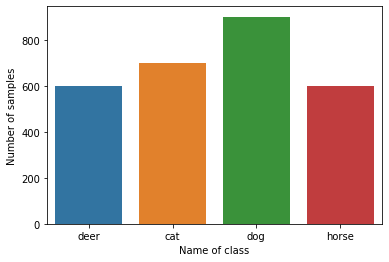

In [ ]:
sns.barplot(x=df['Name of class'],y=df['Number of samples'])

Klasifikasi kan data dengan per kelas

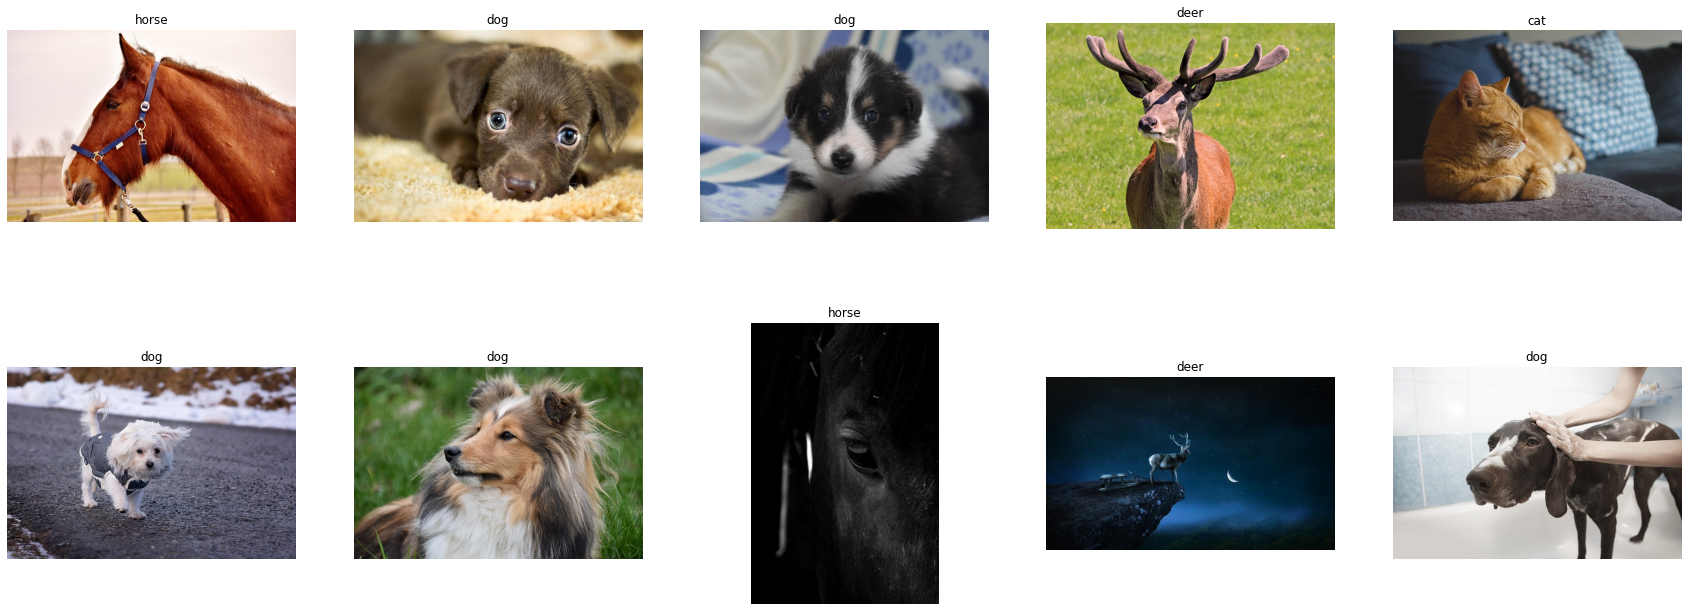

In [ ]:
classes = os.listdir(path+'/train')

plt.figure(figsize=(30 , 30))
for x in range(10):
    i = random.randint(0,3)                    # getting the class
    images = os.listdir(path+'/train'+'/'+classes[i])
    j = random.randint(0,600)                  # getting the image
    image = cv2.imread(path+'/train'+'/'+classes[i]+'/'+images[j])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax = plt.subplot(5, 5, x + 1)
    plt.imshow(image)
    plt.title(classes[i])
    plt.axis("off")

plt.show()

# 3. Preparing the data

In [ ]:
image_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255 , rotation_range=20,
                                                                width_shift_range=0.2,
                                                                height_shift_range=0.2,
                                                                horizontal_flip=True, validation_split=0.2)

In [ ]:
train_ds = image_datagen.flow_from_directory(
        path+'/train',
        subset='training',
        target_size=(224 , 224),
        batch_size=32)

val_ds = image_datagen.flow_from_directory(
        path+'/train',
        subset='validation',
        target_size=(224 , 224),
        batch_size=32 )

Found 2240 images belonging to 4 classes.
Found 560 images belonging to 4 classes.


# 4. Building the model

In [ ]:
# i'll be using inception_v3 for this model , along with 2 extra dense layers and the output layer

mobilenet = tf.keras.applications.mobilenet.MobileNet(input_shape=(224 , 224, 3),
                                           include_top=False,
                                           weights='imagenet')

model = Sequential()
model.add(mobilenet)
model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(4, activation="softmax" , name="classification"))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0005,momentum=0.9), 
            loss='categorical_crossentropy',
            metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 1024)              1049600   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 classification (Dense)      (None, 4)                 2

# 5. Training and evaluating

Latih dan evaluasikan data menggunakan train_ds,val_ds dan disini epochs nya 6 agar tidak terjadi overfitting


In [ ]:
history = model.fit(train_ds , validation_data = val_ds , epochs = 6)

Epoch 1/6
70/70 [==============================] - 940s 13s/step - loss: 0.8791 - accuracy: 0.6705 - val_loss: 0.4692 - val_accuracy: 0.8607
Epoch 2/6
70/70 [==============================] - 618s 9s/step - loss: 0.3425 - accuracy: 0.9022 - val_loss: 0.2996 - val_accuracy: 0.9054
Epoch 3/6
70/70 [==============================] - 600s 9s/step - loss: 0.2416 - accuracy: 0.9201 - val_loss: 0.2239 - val_accuracy: 0.9232
Epoch 4/6
70/70 [==============================] - 611s 9s/step - loss: 0.1761 - accuracy: 0.9473 - val_loss: 0.1948 - val_accuracy: 0.9357
Epoch 5/6
70/70 [==============================] - 601s 9s/step - loss: 0.1395 - accuracy: 0.9567 - val_loss: 0.1827 - val_accuracy: 0.9429
Epoch 6/6
70/70 [==============================] - 630s 9s/step - loss: 0.1240 - accuracy: 0.9647 - val_loss: 0.1709 - val_accuracy: 0.9446


Visualisasi kan hasil dari data evaluasi atau val_ds menggunakan plot diagram


18/18 [==============================] - 35s 2s/step - loss: 0.1706 - accuracy: 0.9446


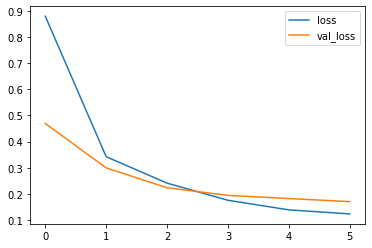

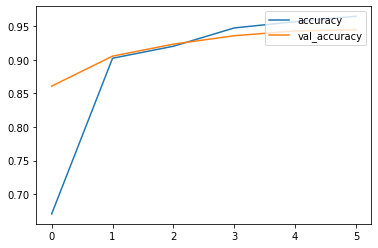

In [ ]:
model.evaluate(val_ds)

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'],loc='upper right')
plt.show()
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'],loc='upper right')
plt.show()

# 6. Preparing for submission
ambil file.csv untuk mmenjadikan file data sample,lokasi sampe_submission ada di google drive

In [ ]:
sub_csv ='/content/drive/MyDrive/Stupen_File/Sample_submission.csv'
path_test = '/content/drive/MyDrive/Stupen_File/test/'

In [ ]:
df_sub = pd.read_csv(sub_csv)
image_id = df_sub['ID']
df_sub.head(10)

,ID,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0


Program akan melabelkan dari salah satu foto,disini saya mengambil salah satu foto dari data test


In [ ]:
path_test = '/content/drive/MyDrive/Stupen_File/test/test'

In [ ]:
# each image will be treated individually and saved in a list which is then merged with the id of it's correspondence

from tensorflow.keras.preprocessing.image import load_img


# making a list for our predictions
labels = []


for i in image_id:
    image = load_img(path_test+'/'+str(i)+'.jpg', target_size=(224, 224))
    img = np.array(image)
    img = img / 255.0
    img = img.reshape(1,224,224,3)
    label = model.predict(img)
    label_id = label[0].tolist()
    
    labels.append(label_id.index(max(label_id)))


1/1 [==============================] - 0s 69ms/step


In [ ]:
# we will replace the previous empty columns with the new predictions    
    
df_sub['Label'] = labels
df_sub.head(10)

,ID,Label
0,1,1
1,2,0
2,3,2
3,4,3
4,5,2
5,6,1
6,7,3
7,8,0
8,9,3
9,10,2


Terakhir,program akan menyimpan hasil data yang telah di olah ke dalam file .csv

In [ ]:
# saving file
df_sub.to_csv('submission_file.csv',index=False)